# Solving a Binary Classification Problem using Keras
### Name: Mutian Yan

### Steps:
    1. Data Observation / Visualization
    2. Data Preprocessing
    3. Neural Network Architecture
    4. Hyperparameters Tuning
    5. Results

Introduction:

The dataset is from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Bank+Marketing The project is a binary classification problem to predict whether the client will subscribe to a term deposit. It is also known as Churn Prediction. The dataset 'bank.csv' has 16 features and 11162 records. Some of the features have categorical values and the rest are numeric.

In [244]:
import numpy as np 
import pandas as pd 
import keras
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [245]:
# load in the data
df = pd.read_csv('./bank.csv')
# the alternative dataset have more x3 more records than the one I found on UCI ML website
df_2 = pd.read_csv('./bank-marketing.csv')
print(df.shape)
print(df_2.shape)

print(df.head())
# checking if the features have any null values that need to be cleaned
df.isnull().sum()


(11162, 17)
(45211, 17)
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

1. Data Visualization

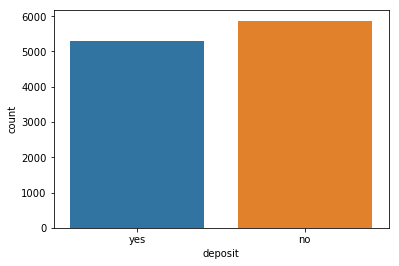

In [246]:
# sns.countplot(x='Class', data=df_2)
# check whether the dataset is skewed. It appeared to be a balanced dataset.
sns.countplot(x='deposit', data=df)

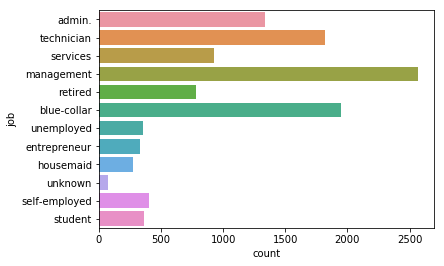

In [247]:
sns.countplot(y = 'job', data=df)

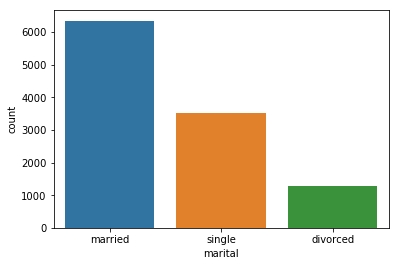

In [248]:
sns.countplot(x = 'marital', data=df)

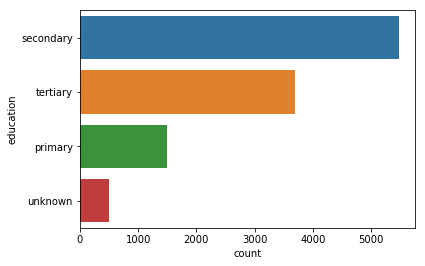

In [249]:
df.education.value_counts()
sns.countplot(y = 'education', data=df)

2. Data Preprocessing (using pandas)

Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1

In [250]:
# encode categorical values
le = preprocessing.LabelEncoder()
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.default = le.fit_transform(df.default)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.contact = le.fit_transform(df.contact)
df.month = le.fit_transform(df.month)
df.poutcome = le.fit_transform(df.poutcome)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)
df.deposit = le.fit_transform(df.deposit)
df.head()
df.shape


(11162, 17)

In [252]:

# normalize the data to balance out the weight difference
# normalize balance and duration to range [1, 10]
# also the age


print('\n max values of features before normalization: \n')
print(df.max())


# Create x, where x the 'balance' column's values as floats
x = df[['balance']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df[['balance']] = df_normalized


# repeat the steps for duration and padays 
x = df[['duration']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df[['duration']] = df_normalized

x = df[['pdays']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df[['pdays']] = df_normalized

print('\n max values of features after normalization: \n')
print(df.max())


# separate features and class
X = df.iloc[:,0:16]
X[0:10]


 max values of features before normalization: 

age          95.0
job          11.0
marital       2.0
education     3.0
default       1.0
balance       1.0
housing       1.0
loan          1.0
contact       2.0
day          31.0
month        11.0
duration      1.0
campaign     63.0
pdays         1.0
previous     58.0
poutcome      3.0
deposit       1.0
dtype: float64

 max values of features after normalization: 

age          95.0
job          11.0
marital       2.0
education     3.0
default       1.0
balance       1.0
housing       1.0
loan          1.0
contact       2.0
day          31.0
month        11.0
duration      1.0
campaign     63.0
pdays         1.0
previous     58.0
poutcome      3.0
deposit       1.0
dtype: float64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,0.104371,1,0,2,5,8,0.268110,1,0.0,0,3
1,56,0,1,1,0,0.078273,0,0,2,5,8,0.377675,1,0.0,0,3
2,41,9,1,1,0,0.092185,1,0,2,5,8,0.357566,1,0.0,0,3
3,55,7,1,1,0,0.105882,1,0,2,5,8,0.148750,1,0.0,0,3
4,54,0,1,2,0,0.079851,0,0,2,5,8,0.172983,2,0.0,0,3
5,42,4,2,2,0,0.077762,1,1,2,5,8,0.144367,2,0.0,0,3
6,56,4,1,2,0,0.087188,1,1,2,6,8,0.309100,1,0.0,0,3
7,60,5,0,1,0,0.083951,1,0,2,6,8,0.265017,1,0.0,0,3
8,37,9,1,1,0,0.077773,1,0,2,6,8,0.156226,1,0.0,0,3
9,28,7,2,1,0,0.135569,1,0,2,6,8,0.333849,3,0.0,0,3


Why to normalize?

Let me take a simple logistic regression example which will be easy to understand and to explain normalization. Assume we are trying to predict if a customer will subscribe a term deposit. Among many available independent variables lets just consider Age and Balance. Let the equation be of the form:

Y = weight_1 * (Age) + weight_2 * (Income) + some_constant
For this dataset, Age is in range of [0,95] and Income is in range of [0, 81204]. The scale of Age and Balance are very different. If you consider them as is then weights weight_1 and weight_2 may be assigned biased weights. weight_2 might bring more importance to Balance as a feature than to what weight_1 brings importance to Age. To scale them to a common level, we can normalize them. For example, we can bring all the ages in range of [0,1] and all balances in range of [0,1]. Now we can say that Age and Balance are given equal importance as a feature.

Observation after normalization: The sgd optimizer does not perform as good as adam on this dataset. After normalizing the features, the accuracy improves by roughly 10%. The Accuracy and Loss function plots look more smooth than before.

In [253]:
# get class labels
y = df.iloc[:,16]
y[0:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: deposit, dtype: int64

In [254]:
# use scikit learn's train_test_split to split the dataset
# 80/20 split
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
x_train.shape, y_train.shape

((8929, 16), (8929,))

In [255]:
x_test.shape, y_test.shape

((2233, 16), (2233,))

3. Neural Network Architecture

In [266]:
model = Sequential()
model.add(Dense(20, input_dim=16, activation='relu')) # relu, tanh
model.add(Dense(1, activation='sigmoid'))

In [267]:
# specify learning rate, decay, momentum
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# adam = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
# RMSprop = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [268]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)
#print(x_train_keras.shape)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [269]:
history = model.fit(np.array(x_train_keras), np.array(y_train_keras), validation_split=0.1, epochs=15, batch_size=15, shuffle=True)

Train on 8036 samples, validate on 893 samples
Epoch 1/15
8036/8036 [==============================] - 8s 1ms/step - loss: 0.8036 - accuracy: 0.5688 - val_loss: 0.6153 - val_accuracy: 0.6517
Epoch 2/15
8036/8036 [==============================] - 3s 386us/step - loss: 0.6237 - accuracy: 0.6603 - val_loss: 0.5861 - val_accuracy: 0.6753
Epoch 3/15
8036/8036 [==============================] - 3s 385us/step - loss: 0.5921 - accuracy: 0.6908 - val_loss: 0.5639 - val_accuracy: 0.7032
Epoch 4/15
8036/8036 [==============================] - 3s 399us/step - loss: 0.5743 - accuracy: 0.7064 - val_loss: 0.5591 - val_accuracy: 0.7077
Epoch 5/15
8036/8036 [==============================] - 3s 404us/step - loss: 0.5589 - accuracy: 0.7185 - val_loss: 0.5362 - val_accuracy: 0.7324
Epoch 6/15
8036/8036 [==============================] - 3s 397us/step - loss: 0.5412 - accuracy: 0.7362 - val_loss: 0.5296 - val_accuracy: 0.7436
Epoch 7/15
8036/8036 [==============================] - 3s 372us/step - loss: 0

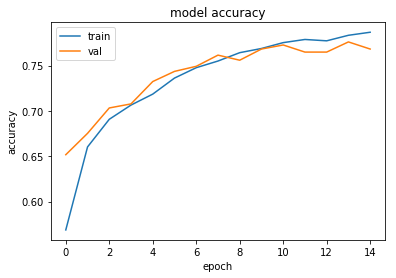

In [270]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

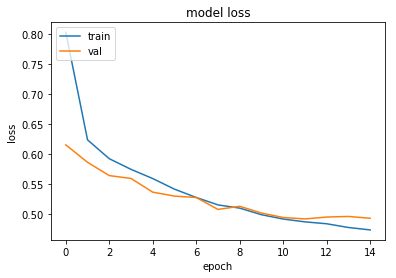

In [271]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [272]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 79.98%


4. Hyperparameters Tuning Procedures and Results

First, I tested whether the model has an overfitting or underfitting problem. Based on the not so large difference between accuracy on the training set and dev set, I conclude that there is not an apparent problem with underfitting (high bias) or overfitting (high variance). But as the complexity of the model increases, such as adding more hidden units on each layer, the overfitting problem appears.


Hyperparameters: 

**Learning Rate**
When choosing SGD as an optimizer, changing the learning rate from 0.01 to 0.1, the accuracy dropped dramatically, roughly about 10%. On the other hand, I tried to change the learning rate to 0.001. By looking at the accuracy and loss value plot, the model performed better consistently on dev set compared with on the training set. SGD with learning rate 0.01 has the best performance.

**Optimization Algorithm**
I tried several optimizer algorithms such as Adam, SGD and RMSprop. Adam, the default parameters have the best performance overall. 


**Activation Function**
I have tried different combinations of activation functions on every layer but last layer, and last layer. The result showed that the choice of activation function on the last layer is vital compared to the changes in every layer before the last layer. The sigmoid function stands out for this binary classification dataset. Tanh and ReLu perform similarly on this dataset.

**Batch Size**
For this model, the smaller the size of mini-batch is, the slightly more accurate the result is. If increasing size by a lot, the accuracy drop is significant. Due to the size of the dataset (~10k), maybe the mini-batch algorithm does not improve the accuracy by a noticeable amount.

**Number of units on layers but last layer**
It seems to be the more units it has on each layer, the performance might improve by a small amount at first. But after seeing the accuracy plot, the performance is not consistently good due to other random factors added when the network is too complicated.

5. Results

Data visualization, check the distribution of data. Data Processing contains steps: changing the categorical features into numeric and normalizing the feature values. Then I started to train the model. The split is 80/20 on training and test. Then during training, 10% of data treated as a development set (validation set). Then I tuned the hyperparameters respectively, with the support of accuracy and loss plot, I could have a clear view of whether the performance is overfitting or underfitting. Limited by the size of the dataset, it could achieve the best accuracy around 80% of the tuned hyperparameters. I later found out that there was a 4 times larger dataset on the website, it could possibly improve the performance of the deep learning approach. It is linked below. They tackle the same churn prediction problem have very similar features. The only downside is it is more skewed than the one I used in this project.

https://datahub.io/machine-learning/bank-marketingData 